In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
import os

In [54]:
df = pd.read_csv(os.path.join("data", "master_data.csv"))
df

,Unnamed: 0,Name,Age,Tm,G,R,H,HR,RBI,SB,SO,BA,SLG,OPS,Year,ID,allstars
0,1,Bobby Abreu,40.0,NYM,78,12,33,1,14,1,21,0.248,0.338,0.680,2014,Bobby Abreu2014,0
1,2,José Abreu,27.0,CHW,145,80,176,36,107,3,131,0.317,0.581,0.964,2014,José Abreu2014,1
2,5,Dustin Ackley,26.0,SEA,143,64,123,14,65,8,90,0.245,0.398,0.692,2014,Dustin Ackley2014,0
3,8,Matt Adams,25.0,STL,142,55,152,15,68,3,114,0.288,0.457,0.779,2014,Matt Adams2014,0
4,10,Jim Adduci,29.0,TEX,44,13,17,1,8,3,27,0.168,0.228,0.467,2014,Jim Adduci2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3703,1714,Andrew Young,27.0,ARI,58,13,19,6,15,0,45,0.209,0.484,0.782,2021,Andrew Young2021,0
3704,1715,Seby Zavala,27.0,CHW,37,15,17,5,15,0,41,0.183,0.376,0.616,2021,Seby Zavala2021,0
3705,1716,Bradley Zimmer,28.0,CLE,99,44,68,8,35,15,122,0.227,0.344,0.669,2021,Bradley Zimmer2021,0
3706,1718,Ryan Zimmerman,36.0,WSN,110,27,62,14,46,0,77,0.243,0.471,0.756,2021,Ryan Zimmerman2021,0


In [56]:
df["allstars"] = df3["allstars"].astype('bool')
df

,Unnamed: 0,Name,Age,Tm,G,R,H,HR,RBI,SB,SO,BA,SLG,OPS,Year,ID,allstars
0,1,Bobby Abreu,40.0,NYM,78,12,33,1,14,1,21,0.248,0.338,0.680,2014,Bobby Abreu2014,False
1,2,José Abreu,27.0,CHW,145,80,176,36,107,3,131,0.317,0.581,0.964,2014,José Abreu2014,True
2,5,Dustin Ackley,26.0,SEA,143,64,123,14,65,8,90,0.245,0.398,0.692,2014,Dustin Ackley2014,False
3,8,Matt Adams,25.0,STL,142,55,152,15,68,3,114,0.288,0.457,0.779,2014,Matt Adams2014,False
4,10,Jim Adduci,29.0,TEX,44,13,17,1,8,3,27,0.168,0.228,0.467,2014,Jim Adduci2014,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3703,1714,Andrew Young,27.0,ARI,58,13,19,6,15,0,45,0.209,0.484,0.782,2021,Andrew Young2021,False
3704,1715,Seby Zavala,27.0,CHW,37,15,17,5,15,0,41,0.183,0.376,0.616,2021,Seby Zavala2021,False
3705,1716,Bradley Zimmer,28.0,CLE,99,44,68,8,35,15,122,0.227,0.344,0.669,2021,Bradley Zimmer2021,False
3706,1718,Ryan Zimmerman,36.0,WSN,110,27,62,14,46,0,77,0.243,0.471,0.756,2021,Ryan Zimmerman2021,False


In [61]:
train, test = train_test_split(df)

In [62]:
xcols = ["Age", "G", "R", "H", "HR", "RBI", "SB", "SO", "BA", "SLG", "OPS"]


In [72]:
model = Pipeline([
    ("std", StandardScaler()),
    ("logr", LogisticRegression())
])
model.fit(train[xcols], train["allstars"])
model.score(test[xcols], test["allstars"])

print(f"Train Accuracy: {model.score(train[xcols], train['allstars'])*100:0.3f}%")
print(f"Valid Accuracy: {model.score(test[xcols], test['allstars'])*100:0.3f}%")

Train Accuracy: 93.995%
Valid Accuracy: 94.067%


<AxesSubplot:>

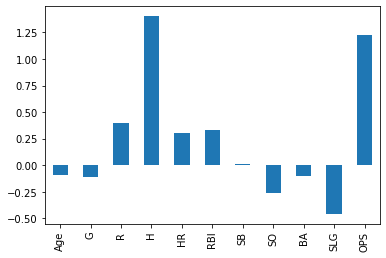

In [69]:
pd.Series(model["logr"].coef_.reshape(-1), index=xcols).plot.bar()

In [88]:
df_pca = df[xcols].dropna()

In [89]:
pca = PCA(n_components = 11)
pca.fit(df_pca)
key_df = pd.DataFrame(pca.components_)

In [90]:
arr = pca.transform(df_pca)
data_df = pd.DataFrame(arr)

In [91]:
pca.explained_variance_ratio_.round(2)

array([0.93, 0.03, 0.02, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [92]:
data_df = pd.DataFrame(pca.fit_transform(df_pca))
key_df = pd.DataFrame(pca.components_)

In [93]:
pca = PCA(n_components = 7)
data_df = pd.DataFrame(pca.fit_transform(df_pca))
key_df = pd.DataFrame(pca.components_)
pca.explained_variance_ratio_.round(3)

array([0.928, 0.033, 0.023, 0.008, 0.004, 0.002, 0.002])

In [94]:
pca = PCA(n_components = 7, whiten = False)
data_df = pd.DataFrame(pca.fit_transform(df_pca))
key_df = pd.DataFrame(pca.components_)
pca.explained_variance_ratio_.round(3)

array([0.928, 0.033, 0.023, 0.008, 0.004, 0.002, 0.002])

In [95]:
component_list = [1,2,3,4,5,6,7,8,9,10,11]

1     0.928540
2     0.958064
3     0.985770
4     0.993160
5     0.996301
6     0.998284
7     0.999633
8     0.999985
9     1.000000
10    1.000000
11    1.000000
dtype: float64
1     0.651862
2     0.794268
3     0.885823
4     0.953988
5     0.972818
6     0.984795
7     0.991301
8     0.995068
9     0.997800
10    0.999027
11    1.000000
dtype: float64


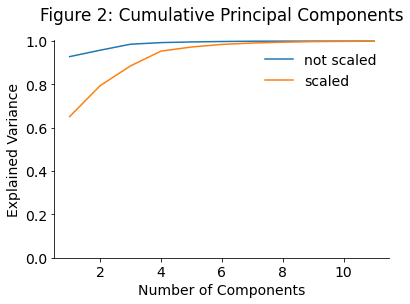

In [96]:
def explained(scale):
    stages = [("imp", SimpleImputer(strategy="most_frequent"))]
    if scale:
        stages.append(("std", StandardScaler()))
    stages.append(("pca", PCA()))
    p = Pipeline(stages)
    p.fit(df[xcols])
    #print(p["pca"].components_.round(2))
    explained = p["pca"].explained_variance_
    s = pd.Series(explained.cumsum() / explained.sum(),
                  index=range(1, len(xcols)+1))
    print(s)
    return s
plt.rcParams.update({'font.size': 14})
ax = explained(False).plot.line(label="not scaled", ylim=0)
explained(True).plot.line(label="scaled", ax=ax)
ax.set_xlabel("Number of Components")
ax.set_ylabel("Explained Variance")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(frameon=False)
ax.set_title("Figure 2: Cumulative Principal Components", pad=20)

plt.savefig("Fig 2.png", bbox_inches = 'tight')

In [68]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train[xcols], train["allstars"])
print(f"Train Accuracy: {knn.score(train[xcols], train['allstars'])*100:0.3f}%")
print(f"Valid Accuracy: {knn.score(test[xcols], test['allstars'])*100:0.3f}%")

Train Accuracy: 94.858%
Valid Accuracy: 92.557%


In [79]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=12, random_state=0, n_estimators = 100, criterion = "gini", bootstrap = True, min_samples_split = 4, max_features = "sqrt")
clf.fit(train[xcols], train["allstars"])
print(f"Train Accuracy: {clf.score(train[xcols], train['allstars'])*100:0.3f}%")
print(f"Valid Accuracy: {clf.score(test[xcols], test['allstars'])*100:0.3f}%")

Train Accuracy: 99.389%
Valid Accuracy: 94.067%
